<a href="https://colab.research.google.com/github/Muhamad-naufal/Project-MSIB-3/blob/main/Exercise_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Library
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Uji Asumsi Klasik pada Regresi Linier

In [3]:
#Download Dataset
! wget kc_house_3_features.csv https://drive.google.com/file/d/1OjcfLYS5NI2eVHJppg_BGd-fcN5Jj4fo/view

--2022-09-15 20:10:21--  http://kc_house_3_features.csv/
Resolving kc_house_3_features.csv (kc_house_3_features.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘kc_house_3_features.csv’
--2022-09-15 20:10:21--  https://drive.google.com/file/d/1OjcfLYS5NI2eVHJppg_BGd-fcN5Jj4fo/view
Resolving drive.google.com (drive.google.com)... 142.250.157.113, 142.250.157.100, 142.250.157.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.157.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view’

view                    [ <=>                ]  66.17K  --.-KB/s    in 0.1s    

2022-09-15 20:10:22 (516 KB/s) - ‘view’ saved [67754]

FINISHED --2022-09-15 20:10:22--
Total wall clock time: 0.9s
Downloaded: 1 files, 66K in 0.1s (516 KB/s)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Model Regresi Linear
data = pd.read_csv('drive/MyDrive/dataset/kc_house_3_features.csv')
data.head()

,sqft_living,sqft_living15,sqft_above,price
0,1180,1340,1180,221900.0
1,2570,1690,2170,538000.0
2,770,2720,770,180000.0
3,1960,1360,1050,604000.0
4,1680,1800,1680,510000.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sqft_living    100 non-null    int64  
 1   sqft_living15  100 non-null    int64  
 2   sqft_above     100 non-null    int64  
 3   price          100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


## Hubungan Linier antara tiap feature dengan label (X dan Y)

In [7]:
data.corr()

,sqft_living,sqft_living15,sqft_above,price
sqft_living,1.000000,0.774798,0.837615,0.650602
sqft_living15,0.774798,1.000000,0.755848,0.648145
sqft_above,0.837615,0.755848,1.000000,0.515989
price,0.650602,0.648145,0.515989,1.000000


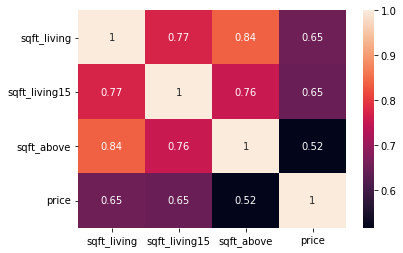

In [8]:
# Tulis code di sini
sns.heatmap(data.corr(), annot=True)
plt.show()

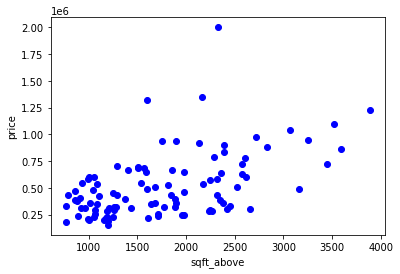

In [9]:
plt.scatter(data['sqft_above'], data['price'], color='blue')
plt.xlabel("sqft_above")
plt.ylabel("price")
plt.show()

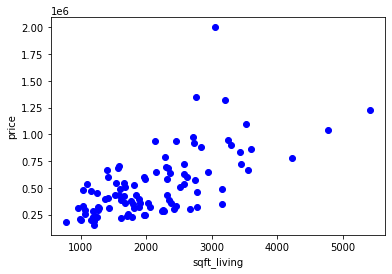

In [10]:
plt.scatter(data['sqft_living'], data['price'], color='blue')
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

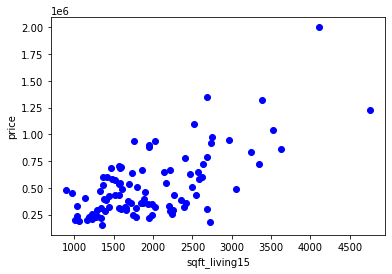

In [11]:
plt.scatter(data['sqft_living15'], data['price'], color='blue')
plt.xlabel("sqft_living15")
plt.ylabel("price")
plt.show()

## Splitting Data Menjadi Data Train dan Test

In [14]:
features = ['sqft_living', 'sqft_above']
X = data[features].values
Y = data.price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [15]:
# Tulis code di sini
print('Data Train : ', end='')
print(X_train.shape, Y_train.shape)
print('\nData Test : ', end='')
print(X_train.shape, Y_test.shape)

Data Train : (80, 2) (80,)

Data Test : (80, 2) (20,)


## Modeling

In [16]:
# Tulis code di sini
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

# 2. Uji normalitas

hasil uji Kolmogorov Smirnov 
 KstestResult(statistic=0.11967204803640658, pvalue=0.18637784652608405)


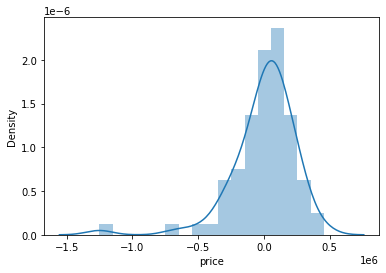

In [17]:
# Tulis code di sini
y_predtrain = lin_reg.predict(X_train)
err = y_predtrain - Y_train
sns.distplot(err)

z_er = stats.zscore(err)
norm_er = stats.kstest(z_er, 'norm',)
print('hasil uji Kolmogorov Smirnov \n', norm_er)

# 3. Tidak terjadi Heteroskedastisitas

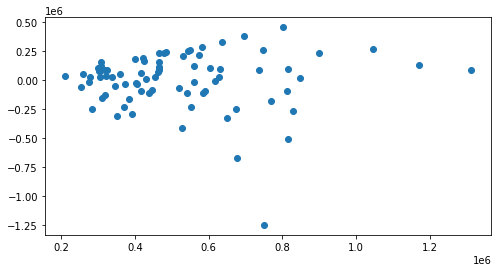

In [18]:
# Tulis code di sini
plt.figure(figsize=(8, 4))
plt.scatter(y_predtrain, err)
plt.show()

# 4. Tidak terjadi Multikolinearitas (khusus regresi berganda)

In [19]:
# Tulis code di sini
vif = [variance_inflation_factor(X_train, i) for i in range(len(X_train.T))]
pd.DataFrame({'VIF': vif[0:]}, index=features).T

,sqft_living,sqft_above
VIF,20.967127,20.967127


# 5. Tidak terjadi Autokorelasi

In [20]:
# Tulis code di sini
X_constant = sm.add_constant(X_train)
linreg = sm.OLS(Y_train, X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     29.78
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.63e-10
Time:                        20:20:56   Log-Likelihood:                -1105.2
No. Observations:                  80   AIC:                             2216.
Df Residuals:                      77   BIC:                             2223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.69e+04   7.45e+04      0.495      0.622   -1.11e+05    1.85e+05
x1           260.8673     56.392      4.626      0.000     148.577     373.158
x2           -35.7113     70.833     -0.504      0.616    -176.759     105.336
==============================================================================
Omnibus:                       53.152   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.128
Skew:                           2.005   Prob(JB):                     2.94e-55
Kurtosis:                      10.698   Cond. No.                     7.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Mengevaluasi hasil regresi linier

In [21]:
# Tulis code di sini
y_predtest = lin_reg.predict(X_test)

# MSE
MSE_train = mean_squared_error(Y_train, y_predtrain)
print('Nilai MSE data training = ', MSE_train)
MSE_test = mean_squared_error(Y_test, y_predtest)
print('Nilai MSE data testing = ', MSE_test)

# RMSE
RMSE_train = np.sqrt(MSE_train)
print('Nilai RMSE data training =', RMSE_train)
RMSE_test = np.sqrt(MSE_test)
print('Nilai RMSE data testing = ', RMSE_test)

# MAE
MAE_train = mean_absolute_error(Y_train, y_predtrain)
print('Nilai MAE data training =', MAE_train)
MAE_test = mean_absolute_error(Y_test, y_predtest)
print('Nilai MAE data testing =', MAE_test)

Nilai MSE data training =  58424141636.89635
Nilai MSE data testing =  29839172410.932648
Nilai RMSE data training = 241710.8637130246
Nilai RMSE data testing =  172740.1875966697
Nilai MAE data training = 167159.6603558439
Nilai MAE data testing = 145401.26801910656


## Visualisasi Hasil Prediksi

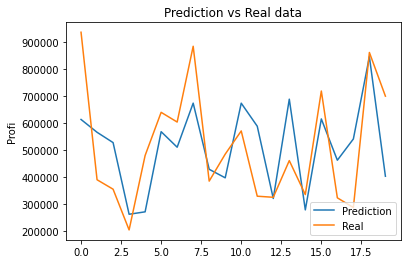

In [22]:
# Tulis code di sini
plt.plot(y_predtest)
plt.plot(Y_test.values)

#Judul untuk Gambar
plt.title('Prediction vs Real data')

#Penambahan yLabel
plt.ylabel("Profi")

#Penambahan untuk Plot/Gambar
plt.legend(labels=['Prediction', "Real"], loc='lower right')

## Koefisien Determinasi (R2)

In [23]:
print(f'R^2 score: {lin_reg.score(X, Y) }')

R^2 score: 0.42581095784820555


# Uji Simultan, Parsial, dan Besar Pengaruh Feature

In [24]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     29.78
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.63e-10
Time:                        20:24:55   Log-Likelihood:                -1105.2
No. Observations:                  80   AIC:                             2216.
Df Residuals:                      77   BIC:                             2223.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.69e+04   7.45e+04      0.495      0.622   -1.11e+05    1.85e+05
x1           260.8673     56.392      4.626      0.000     148.577     373.158
x2           -35.7113     70.833     -0.504      0.616    -176.759     105.336
==============================================================================
Omnibus:                       53.152   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.128
Skew:                           2.005   Prob(JB):                     2.94e-55
Kurtosis:                      10.698   Cond. No.                     7.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Kesimpulan

In [26]:
# Input data baru
sqft_living = float(input('Input sqft_living \t= '))
sqft_above = float(input('Input sqft_above\t= '))
data_baru = [[sqft_living, sqft_above]]

# Prediksi data baru menggunakan model Regresi Linear
hasil_prediksi = lin_reg.predict(data_baru)
hasil_prediksi = float(hasil_prediksi)

# Cetak hasil prediksi (Profit)
print('\nPrediksi Price8 yang akan didapat adalah', hasil_prediksi)

Input sqft_living 	= 30
Input sqft_above	= 80

Prediksi Price yang akan didapat adalah 41871.252807252684
